## **世界大學排名分析**（以2022年QS排名为例）

**資料來源：**QS官網，kaggle統整。*https://www.kaggle.com/datasets/erfansobhaei/ultimate-university-ranking*

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取 CSV 檔案並轉換為 DataFrame
df2022 = pd.read_csv('QS_2022.csv')
display(df2022)

,rank_in_country,rank_in_subregion,rank_2022,rank_2021,institution,country_code,country,size,focus,research,...,er_rank,fsr_score,fsr_rank,cpf_score,cpf_rank,ifr_score,ifr_rank,isr_score,isr_rank,score_scaled
0,1,1.0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,CO,VH,...,4,100.0,12,100.0,6,100.0,45,91.4,105,100
1,1,1.0,2,5,University of Oxford,UK,United Kingdom,L,FC,VH,...,3,100.0,5,96.0,34,99.5,83,98.5,52,99.5
2,2,2.0,3,2,Stanford University,US,United States,L,FC,VH,...,5,100.0,9,99.9,10,99.8,73,67.0,208,98.7
3,2,2.0,3,7,University of Cambridge,UK,United Kingdom,L,FC,VH,...,2,100.0,10,92.1,48,100.0,57,97.7,64,98.7
4,3,3.0,5,3,Harvard University,US,United States,L,FC,VH,...,1,99.1,37,100.0,3,84.2,188,70.1,196,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,4,121.0,1201+,1001+,University POLITEHNICA of Bucharest,RO,Romania,L,FO,VH,...,501+,4.8,601+,7.0,601+,1.1,601+,3.2,601+,-
1296,4,121.0,1201+,NaN,"University Politehnica of Timisoara, UPT",RO,Romania,L,FO,VH,...,501+,10.6,601+,3.9,601+,1.0,601+,2.1,601+,-
1297,6,58.0,1201+,1001+,Yarmouk University,JO,Jordan,XL,FC,MD,...,501+,1.9,601+,2.2,601+,1.2,601+,11.0,601+,-
1298,16,72.0,1201+,1001+,Yildiz Technical University,TR,Turkey,XL,CO,HI,...,501+,6.1,601+,5.4,601+,1.1,601+,8.9,601+,-


# Q1：不同國家的大學數量分佈，哪幾個國家有最多大學？

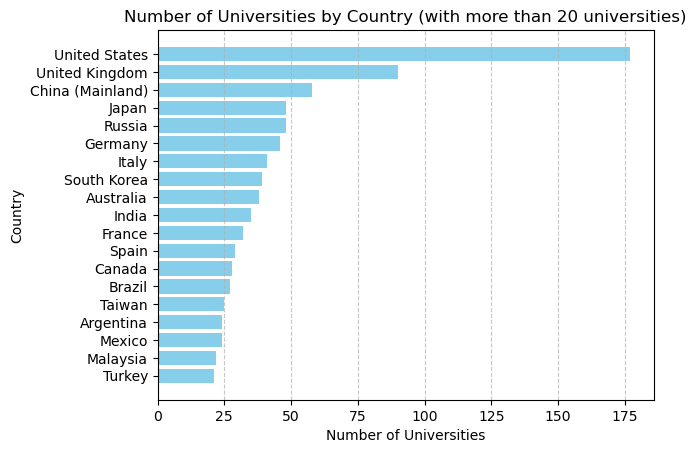

In [47]:
country_counts = df2022['country'].value_counts() # 計算各國大學總數
filtered_countries = country_counts[country_counts > 20] # 篩出超過25間大學的國家
filtered_countries = filtered_countries.sort_values(ascending=True) # 由多至少排序

# 調整圖表尺寸與間距
plt.figure()
plt.barh(filtered_countries.index, filtered_countries, color='skyblue')

# 添加標題與軸標籤
plt.title('Number of Universities by Country (with more than 20 universities)')
plt.xlabel('Number of Universities')
plt.ylabel('Country')

plt.grid(axis='x', linestyle='--', alpha=0.7)  # 添加格線
plt.show()

依照圖表所示，美國遙遙領先成為全球大學最多的國家，英國和中國大陸則分列第二和第三位。值得注意的是，台灣被記錄於QS排名中的大學數量接近25間，這使得台灣成為世界大學數量位居前20多的國家之一。

# Q2：哪個國家有最多大學排名在世界前50？

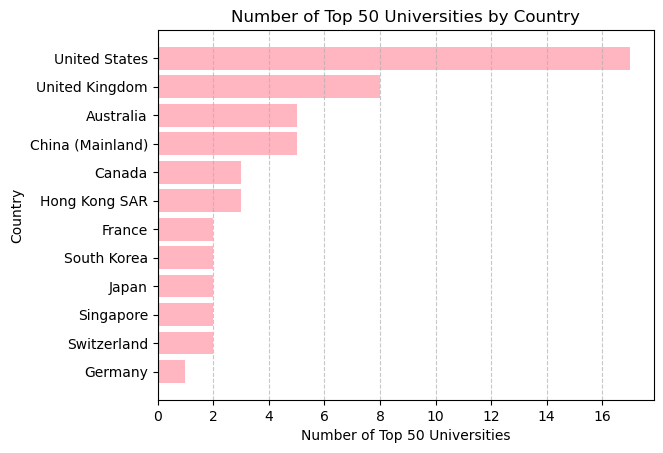

In [94]:
# 剔除排名靠前的資料方便處理
top_universities = df2022.head(200)
#print(top_universities)

import warnings
warnings.filterwarnings('ignore')
top_universities['rank_2022'] = top_universities['rank_2022'].astype(int) # 轉換資料格式
top50_universities = top_universities[top_universities['rank_2022'] <= 50]
#print(top50_universities)

# 計算每個國家在排名前100的大學中的數量
top_counts = top50_universities['country'].value_counts()
top_counts = top_counts.sort_values(ascending=True)
#print(top_counts)

# 調整圖表尺寸與間距
plt.figure()
plt.barh(top_counts.index, top_counts, color='lightpink')

# 添加標題與軸標籤
plt.title('Number of Top 50 Universities by Country')
plt.xlabel('Number of Top 50 Universities')
plt.ylabel('Country')

plt.grid(axis='x', linestyle='--', alpha=0.7)  # 添加格線
plt.show()

根據圖表顯示，美國仍然是世界排名前50的大學數量最多的國家，英國排名第二、澳洲則排名第三。

# Q3：全國大學排名前50的數量是否與全國大學數量有關？

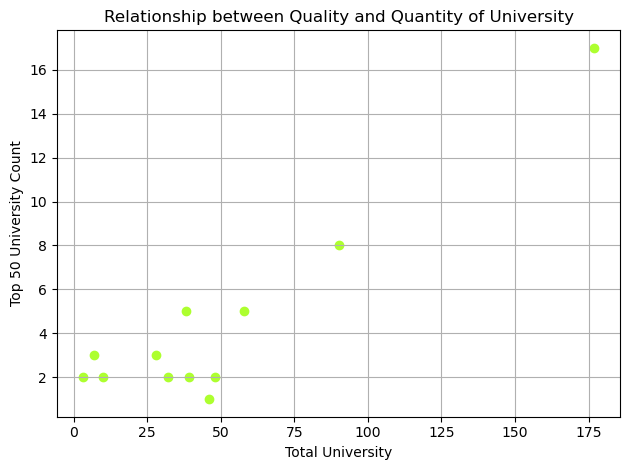

In [93]:
comparison_df = pd.DataFrame({'Top Counts': top_counts, 'Total University Counts': country_counts})
#print(comparison_df)

# 繪製散點圖
plt.figure()
plt.scatter(comparison_df['Total University Counts'], comparison_df['Top Counts'], color='greenyellow', alpha=1)
plt.title('Relationship between Quality and Quantity of University')
plt.xlabel('Total University')
plt.ylabel('Top 50 University Count')

# 顯示圖表
plt.grid(True)
plt.tight_layout()
plt.show()

如圖所示，除了美國及英國之外，其他國家的大學數量與質量並不完全呈現直接關聯。